***PRICING***


Bir oyun şirketi bir oyununda kullanıcılarına item satın alımları için hediye paralar vermiştir.
Kullanıcılar bu sanal paraları kullanarak karakterlerine çeşitli araçlar satın almaktadır.
Oyun şirketi bir item için fiyat belirtmemiş ve kullanıcılardan bu item'ı istedikleri fiyattan almalarını sağlamış.
Örneğin kalkan isimli item için kullanıcılar kendi uygun gördükleri miktarları ödeyerek bu kalkanı satın alacaklar.
Örneğin bir kullanıcı kendisine verilen sanal paralardan 30 birim, diğer kullanıcı 45 birim ile ödeme yapabilir.
Dolayısıyla kullanıcılar kendilerine göre ödemeyi göze aldıkları miktarlar ile bu item'ı satın alabilirler.

Çözülmesi gereken problemler:
1. Item'in fiyatı kategorilere göre farklılık göstermekte midir? İstatistiki olarak ifade ediniz.
2. İlk soruya bağlı olarak item'ın fiyatı ne olmalıdır? Nedenini açıklayınız?
3. Fiyat konusunda "hareket edebilir olmak" istenmektedir. Fiyat stratejisi için karar destek sistemi oluşturunuz ve
4. olası fiyat değişiklikleri için item satın almalarını ve gelirlerini simüle ediniz.




In [1]:
import pandas as pd
from scipy.stats import shapiro
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import pandas as pd
import itertools
import statsmodels.stats.api as sms
from scipy.stats import shapiro
import scipy.stats as stats
df = pd.read_csv("../input/pricingg/pricing kopyas 2.csv" , sep = ";")



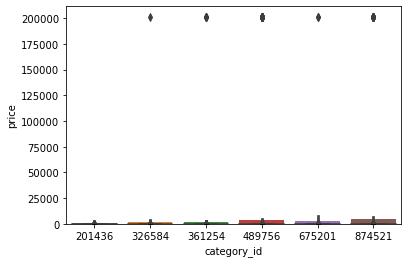

In [2]:
#Gorsellestirme(Aykırı degerlerin gozlenmesi)

sns.boxplot(x = "category_id" , y = "price" , data = df)
sns.barplot(x = "category_id" , y = "price" , data = df)

In [3]:
#Toplam gozlem sayısı

len(df)

3448

In [4]:
#Aykırı degerlerın alt ve ust degerlerinin tespiti.

def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.05)
    quartile3 = dataframe[variable].quantile(0.95)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit



def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit



#Baskılama fonksiyonunun uygulanması
replace_with_thresholds(df, "price")

In [5]:
#Guven aralıklarının hesaplanması

sms.DescrStatsW(df.price).tconfint_mean()

(42.74026448657552, 44.62467838760549)

In [6]:
#İlk iki gozlemin gosterilmesi.

df.head(2)

,category_id,price
0,489756,32.117753
1,361254,30.711370


In [7]:
#Kategoriler arasındaki deger farkı.

df.category_id.value_counts()

489756    1705
874521     750
361254     620
326584     145
675201     131
201436      97
Name: category_id, dtype: int64

In [8]:
#A/B testinin daha saglıklı sonuc vermesi  kategorilerin hepsini eşitledim.

df_a = df.loc[df.category_id == 489756 , "price"][0:97].reset_index()
df_b = df.loc[df.category_id == 874521 , "price"][0:97].reset_index()
df_c = df.loc[df.category_id == 361254 , "price"][0:97].reset_index()
df_d = df.loc[df.category_id == 326584 , "price"][0:97].reset_index()
df_e = df.loc[df.category_id == 675201 , "price"][0:97].reset_index()
df_f = df.loc[df.category_id == 201436 , "price"][0:97].reset_index()

In [9]:
#Kategorilerin sütun bazında birlestirilmesi.(A/B testine hazırlık.)

dff = pd.concat([df_a, df_b, df_c , df_d , df_e , df_f] ,axis = 1)
dff = dff.iloc[:,[1,3,5,7,9,11]]

dff.columns = ["489756","874521","361254","326584","675201","201436"]
dff.head(2)

,489756,874521,361254,326584,675201,201436
0,32.117753,66.323935,30.711370,30.000000,32.845208,30.000000
1,34.543840,34.597899,31.572607,31.904145,31.432038,32.653464


#KENDİME NOT


"bes","alti","yedi","sekiz"]
import numpy as np
df_2 = pd.cut(range(0,3448), 8,
       labels=["bir","iki","uc","dort","bes","alti","yedi","sekiz"], ordered=False)
df_2 = pd.DataFrame(df_2)
df_2.columns = ["category_1"]
type(df_2)

In [10]:
#Eksik degerlerin sorgulanması

dff.isnull().sum()

489756    0
874521    0
361254    0
326584    0
675201    0
201436    0
dtype: int64

# Bagımsız İki Orneklem T Testinin Yapılması (A/B TESTING)

A/B testinin yapılabilmesi icin iki varsayımın saglanması gerekmektedir.Bunlar:

- 1.Normallik Varsayımı
- 2.Varyans Homojenliği

Gelin varsayımları saglayıp saglamadıgını kontrol etmek icin kategoriler arasında caprazlama yaparak bunu test edelim.

Not :
***Hipotezlerin pvalue degerine gore yorumlanması:***
- Pvalue degeri 0.05'den buyukse H0 reddedilemez.
- Pvalue degeri 0.05'den kucukse H0 reddedilir.



**1.Normallik Varsayımı**
- H0 : Normal dağılım varsayımı sağlanmaktadır.
- H1 : Normal dağılım varsayımı sağlanmamaktadır.




***Normallik varsayım sonuclarının degerlendirilmesi***
- Tum caprazlamalarda pvalue degeri 0.05'den kucuk oldugu icin H0 reddedilir. Yani, normal dağılım varsayımı sağlanmamaktadır. Bundan dolayı nonparametrik testi (Mann-Whitney U test) yapacagız.


In [11]:
#Normallik varsayımı. Tum caprazlamalarda pvalue degeri 0.05'den kucuk oldugu icin H0 reddedilir. Yani, normal dağılım varsayımı sağlanmamaktadır.

items = ["489756","874521","361254","326584","675201","201436"]
a = [(items[i],items[j]) for i in range(len(items)) for j in range(i+1, len(items))]

for i in range(0,15):
    print(a[i][0] , "ve" , a[i][1])
    df_a = dff[a[i][0]]
    #df_a = df_a.reset_index()
    df_a.columns = ["A"]
    df_b = dff[a[i][1]]
    #df_b = df_b.reset_index()
    df_b.columns = ["B"]
    print('Test İstatistiği = %.4f, p-değeri = %.4f' % shapiro(df_a))
    print('Test İstatistiği = %.4f, p-değeri = %.4f' % shapiro(df_b))

489756 ve 874521
Test İstatistiği = 0.5702, p-değeri = 0.0000
Test İstatistiği = 0.4660, p-değeri = 0.0000
489756 ve 361254
Test İstatistiği = 0.5702, p-değeri = 0.0000
Test İstatistiği = 0.3723, p-değeri = 0.0000
489756 ve 326584
Test İstatistiği = 0.5702, p-değeri = 0.0000
Test İstatistiği = 0.3509, p-değeri = 0.0000
489756 ve 675201
Test İstatistiği = 0.5702, p-değeri = 0.0000
Test İstatistiği = 0.4479, p-değeri = 0.0000
489756 ve 201436
Test İstatistiği = 0.5702, p-değeri = 0.0000
Test İstatistiği = 0.6190, p-değeri = 0.0000
874521 ve 361254
Test İstatistiği = 0.4660, p-değeri = 0.0000
Test İstatistiği = 0.3723, p-değeri = 0.0000
874521 ve 326584
Test İstatistiği = 0.4660, p-değeri = 0.0000
Test İstatistiği = 0.3509, p-değeri = 0.0000
874521 ve 675201
Test İstatistiği = 0.4660, p-değeri = 0.0000
Test İstatistiği = 0.4479, p-değeri = 0.0000
874521 ve 201436
Test İstatistiği = 0.4660, p-değeri = 0.0000
Test İstatistiği = 0.6190, p-değeri = 0.0000
361254 ve 326584
Test İstatistiği = 0

**2.Varyans Homojenligi Varsayımı**


***Varyans homojenligi varsayımında kurulan hıpotez:***
- H0: Varyanslar Homojendir.
- H1: Varyanslar Homojen Değildir.

***Varyans homojenliginin degerlendirilmesi:***
Gruplar arasında yapılan caprazlamalar sonucunda tum pvalue degerleri 0.05'den buyuk oldugu ıcın H0 reddedilemez. Yani Varyanslar homojendir. İstisna olarak caprazlamada 489756 ve 201436 gruplanının varyans homojenligi saglamadıgı tespit edilmistir.

In [12]:
#Varyans homojenligi(tum varyanslar homojen dagılmaktadır.)


items = ["489756","874521","361254","326584","675201","201436"]
a = [(items[i],items[j]) for i in range(len(items)) for j in range(i+1, len(items))]

for i in range(0,15):
    print(a[i][0] , "ve" , a[i][1] )
    print('Test İstatistiği = %.4f, p-değeri = %.4f' % stats.levene(dff[a[i][0]], dff[a[i][1]]))
    
    p = stats.levene(dff[a[i][0]], dff[a[i][1]])
    if p[1] < 0.05:
        print(a[i][0] , "ve" , a[i][1] , " pvalue degeri 0.05'den kucuk oldugu icin h0 reddedilir. Yani varyanslar homojen dagılmamaktadır.")
    else:
        print(a[i][0] , "ve" , a[i][1] , " pvalue degeri 0.05'den buyuk oldugu icin h0 reddedilemez. Yani varyanslar homojen dagılmaktadır.")

489756 ve 874521
Test İstatistiği = 0.6148, p-değeri = 0.4339
489756 ve 874521  pvalue degeri 0.05'den buyuk oldugu icin h0 reddedilemez. Yani varyanslar homojen dagılmaktadır.
489756 ve 361254
Test İstatistiği = 0.4225, p-değeri = 0.5165
489756 ve 361254  pvalue degeri 0.05'den buyuk oldugu icin h0 reddedilemez. Yani varyanslar homojen dagılmaktadır.
489756 ve 326584
Test İstatistiği = 2.5120, p-değeri = 0.1146
489756 ve 326584  pvalue degeri 0.05'den buyuk oldugu icin h0 reddedilemez. Yani varyanslar homojen dagılmaktadır.
489756 ve 675201
Test İstatistiği = 1.1076, p-değeri = 0.2939
489756 ve 675201  pvalue degeri 0.05'den buyuk oldugu icin h0 reddedilemez. Yani varyanslar homojen dagılmaktadır.
489756 ve 201436
Test İstatistiği = 7.1457, p-değeri = 0.0082
489756 ve 201436  pvalue degeri 0.05'den kucuk oldugu icin h0 reddedilir. Yani varyanslar homojen dagılmamaktadır.
874521 ve 361254
Test İstatistiği = 0.0018, p-değeri = 0.9662
874521 ve 361254  pvalue degeri 0.05'den buyuk oldugu

# A/B Testi

A/B testinin hipotezleri
- H0 : İki grubun satın alma miktar ortalamalarının arasında istatistiksel olarak anlamlı bir fark yoktur.
- H1 : İki grubun satın alma miktar ortalamalarının arasında istatistiksel olarak anlamlı bir fark vardır.

***İstatistiksel olarak anlamlı fark bulunan ikili gruplar:***
- 489756 ve 874521
- 489756 ve 361254
- 489756 ve 326584
- 489756 ve 675201 
- 489756 ve 201436
- 874521 ve 326584
- 361254 ve 326584
- 326584 ve 675201
- 326584 ve 201436

Yukarıdakı capraz kategorilerin pvalue degerleri 0.05'den kucuk oldugu icin H0 reddedilir. Yani, iki grubun satın alma miktar ortalamalarının arasında istatistiksel olarak anlamlı bir fark vardır.

In [13]:
#Tum caprazlamalarda normallik saglanmadıgı icin nonparametrik testi (Mann-Whitney U test)  yapacagız. 


items = ["489756","874521","361254","326584","675201","201436"]
a = [(items[i],items[j]) for i in range(len(items)) for j in range(i+1, len(items))]


for i in range(0,15):
    print(a[i][0] , "ve" , a[i][1] )
    p = stats.stats.mannwhitneyu(dff[a[i][0]] , dff[a[i][1]])
    
    if p[1] < 0.05:
        print("-"*100)
        print(a[i][0] , "ve" , a[i][1] , "pvalue degeri 0.05'den kucuk oldugu ıcın H0 reddedilir.")
        
        
        print("-"*100)
    else:
        print("pvalue degeri 0.05'den buyuk oldugu icin H0 reddedilemez. ")
        
 

489756 ve 874521
----------------------------------------------------------------------------------------------------
489756 ve 874521 pvalue degeri 0.05'den kucuk oldugu ıcın H0 reddedilir.
----------------------------------------------------------------------------------------------------
489756 ve 361254
----------------------------------------------------------------------------------------------------
489756 ve 361254 pvalue degeri 0.05'den kucuk oldugu ıcın H0 reddedilir.
----------------------------------------------------------------------------------------------------
489756 ve 326584
----------------------------------------------------------------------------------------------------
489756 ve 326584 pvalue degeri 0.05'den kucuk oldugu ıcın H0 reddedilir.
----------------------------------------------------------------------------------------------------
489756 ve 675201
----------------------------------------------------------------------------------------------------
489756

## Item'in fiyatı kategorilere göre farklılık göstermekte midir? İstatistiki olarak ifade ediniz.
- Kategoriler arasında item'e verilen deger degismektedir.Kategorileri kendi aralarında caprazlayıp bagımsız ıkı orneklem T testine soktugumuzda ; asağıdakı ikili grupların pvalue degeri 0.05' den kucuk oldugu icin H0 hipotezi reddedilir. Yani grupların(asagıdaki iki cift) ortalamasını karsılastırdıgımızda sans eseri olamayacak sekilde birbirinden farklı oldugu gozukmektedir.


- 489756 ve 874521
- 489756 ve 361254
- 489756 ve 326584
- 489756 ve 675201 
- 489756 ve 201436
- 874521 ve 326584
- 361254 ve 326584
- 326584 ve 675201
- 326584 ve 201436


Yukarıdakı ikili grupların ortalamalarında bir farklılık oldugu AB testi sonucunda gozukmektedir. 

# İlk soruya bağlı olarak item'ın fiyatı ne olmalıdır? Nedenini açıklayınız?
- Aşagıda goruldugu gibi tum kategorilerin tutar ortalaması 36 oldugu icin bu secilebilir.  Cunku yaptıgımız caprazlamalarda sadece iki cifti ortalamalarında istatistiki farklılık vardı. Yani bu grupların ortalamasını alsak da tum grupları temsil etmeyecektir. Bundan dolayı tum tutarların ortalamasını aldım. Lakin bunun da sans eseri olabilecek olayları öngermeme yardım etmediginden dolayı guven aralıklarına bakmaya karar verdim.


In [14]:
#Ortalamaların alınması.

dff.mean().mean()

39.10015049509575

In [15]:
#Betimleyici istatistiklerine bakılması.

dff.describe().T

,count,mean,std,min,25%,50%,75%,max
489756,97.0,42.937450,21.845845,30.0,32.117753,34.891946,44.604229,187.445544
874521,97.0,39.648290,20.502815,30.0,30.915493,33.828879,35.892906,187.445544
361254,97.0,40.117515,25.501210,30.0,30.999253,34.003999,35.170468,187.445544
326584,97.0,36.401966,18.345479,30.0,30.000000,31.525926,35.000000,187.445544
675201,97.0,39.320184,19.393426,30.0,31.382515,34.026924,36.684999,187.445544
201436,97.0,36.175498,8.900154,30.0,31.487818,33.534678,35.919947,74.452929


# Fiyat konusunda "hareket edebilir olmak" istenmektedir. Fiyat stratejisi için karar destek sistemi oluşturunuz ve olası fiyat değişiklikleri için item satın almalarını ve gelirlerini simüle ediniz.

In [16]:
#Hareket edilebilir aralık olusturulması.

sms.DescrStatsW(df.price).tconfint_mean()

(42.74026448657552, 44.62467838760549)

Guven aralıklarının bulunması
(42.74026448657552, 44.62467838760549)




# Gelir Simulasyonu

Guven aralıklarını hesaba katarsak 3 cesit fiyat stratejisi yapmamız gerekmektedir.Bu stratejiler sonucunda elde edecegimiz gelirin hesaplanmasını yapmaya baslayabiliriz.

In [17]:
#1. adım : 42 birim altında satın almak isteyenlerden , elde edilecek gelirin hesaplanması

frekans = len(df.loc[df.price < 42])
gelir = frekans * 42
gelir


109746

- Elde edilecek gelir 109746 birimdir.


In [18]:
#2. adım : 42 ve 44  birim arasında  satın almak isteyenlerden , elde edilecek gelirin hesaplanması


frekans_2 = len(df.loc[(df.price >= 42) & (df.price < 44)])
gelir = frekans_2 * 43
gelir

4257

- Elde edilecek gelir 4257 birimdir.


In [19]:
#3. adım :  44  birim ustunde  satın almak isteyenlerden , elde edilecek gelirin hesaplanması

frekans_3 = len(df.loc[(df.price >= 44)])
gelir = frekans_3 * 44
gelir

32384

- Elde edilecek gelir 32384 birimdir.
